# Week 25:2.3 Pandas 
- toc: true
- image: /images/python.png
- categories: []
- type: ap
- week: 25

In [1]:
import pandas as pd

nba_data = pd.read_csv('./player_data.csv')

print(nba_data)
print(nba_data.columns) 

                     name  year_start  year_end position height  weight  \
0          Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1         Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2     Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3      Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4       Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   
...                   ...         ...       ...      ...    ...     ...   
4545           Ante Zizic        2018      2018      F-C   6-11   250.0   
4546             Jim Zoet        1983      1983        C    7-1   240.0   
4547            Bill Zopf        1971      1971        G    6-1   170.0   
4548          Ivica Zubac        2017      2018        C    7-1   265.0   
4549           Matt Zunic        1949      1949      G-F    6-3   195.0   

             birth_date                                college  
0         June 24, 1968           

In the above code we simply view the Player Data and the columns associated with the Data Set. We are outputted with the head and the tail end of the data. The information is difficult to read and therefore must be preprocessed before analyzed. We can also see the immense length of the data set as there are 4550 rows of information. Therefore we must limit the rows being analyzed as 4550 will require too much time and energy.

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

nba_data = pd.read_csv('./player_data.csv', nrows=15)
nba_data.drop(['birth_date', 'college'], axis=1, inplace=True)
nba_data.dropna(inplace=True)

# Encode categorical variables
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(nba_data[['position']])
onehot = enc.transform(nba_data[['position']])
cols = ['position_' + val for val in enc.get_feature_names(['position'])]
nba_data[cols] = pd.DataFrame(onehot, columns=cols)
nba_data.drop(['position'], axis=1, inplace=True)


nba_data['height'] = nba_data['height'].apply(lambda x: int(x.split('-')[0]) * 12 + int(x.split('-')[1]))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nba_data)

# Calculate the average height and weight
avg_height = nba_data['height'].mean()
avg_weight = nba_data['weight'].mean()

# Print the average height and weight
print(f"Average height: {round(avg_height, 2)} inches")
print(f"Average weight: {round(avg_weight, 2)} pounds")


                   name  year_start  year_end  height  weight  \
0        Alaa Abdelnaby        1991      1995      82     240   
1       Zaid Abdul-Aziz        1969      1978      81     235   
2   Kareem Abdul-Jabbar        1970      1989      86     225   
3    Mahmoud Abdul-Rauf        1991      2001      73     162   
4     Tariq Abdul-Wahad        1998      2003      78     223   
5   Shareef Abdur-Rahim        1997      2008      81     225   
6         Tom Abernethy        1977      1981      79     220   
7           Forest Able        1957      1957      75     180   
8        John Abramovic        1947      1948      75     195   
9          Alex Abrines        2017      2018      78     190   
10           Alex Acker        2006      2009      77     185   
11         Don Ackerman        1954      1954      72     183   
12           Mark Acres        1988      1993      83     220   
13            Bud Acton        1968      1968      78     210   
14           Quincy Acy  

/Users/advayshindikar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In the above code I was able to process the information and drop 2 of the columns to shorten the data. I was also able to encode the categorical variables in order to view the data better. Finally I converted the height and weight column to inches and pounds so that it could be compared and so that I can take the average. I found that when working on this data set, it needed a counter as it was not able to iterate through 4550 rows. To fix this I had to set a limit of the first 100 rows.

In [3]:
import pandas as pd

# Load data
season_data = pd.read_csv('./Seasons_Stats.csv')

# Drop unnecessary columns
season_data = season_data.drop('Unnamed: 0', axis=1)

# Fill missing values
season_data = season_data.fillna(0)

# Convert data types
season_data['Year'] = season_data['Year'].astype(int)

# Print cleaned data
print(season_data)
print(season_data.columns)


       Year             Player  Pos   Age   Tm     G    GS      MP   PER  \
0      1950    Curly Armstrong  G-F  31.0  FTW  63.0   0.0     0.0   0.0   
1      1950       Cliff Barker   SG  29.0  INO  49.0   0.0     0.0   0.0   
2      1950      Leo Barnhorst   SF  25.0  CHS  67.0   0.0     0.0   0.0   
3      1950         Ed Bartels    F  24.0  TOT  15.0   0.0     0.0   0.0   
4      1950         Ed Bartels    F  24.0  DNN  13.0   0.0     0.0   0.0   
...     ...                ...  ...   ...  ...   ...   ...     ...   ...   
24686  2017        Cody Zeller   PF  24.0  CHO  62.0  58.0  1725.0  16.7   
24687  2017       Tyler Zeller    C  27.0  BOS  51.0   5.0   525.0  13.0   
24688  2017  Stephen Zimmerman    C  20.0  ORL  19.0   0.0   108.0   7.3   
24689  2017        Paul Zipser   SF  22.0  CHI  44.0  18.0   843.0   6.9   
24690  2017        Ivica Zubac    C  19.0  LAL  38.0  11.0   609.0  17.0   

         TS%  ...    FT%    ORB    DRB    TRB    AST   STL   BLK   TOV     PF  \
0     

The above code is the Season Data form 1951 to Present. Similar to the previous data set we can see that we have an extrordianry amount of rows and therefore must process the data in order to understand and analyze it.

In [4]:
import pandas as pd
pd.set_option('display.max_rows', None)

# Load data
season_data = pd.read_csv('./Seasons_Stats.csv')

# Drop unnecessary columns
season_data = season_data.drop('Unnamed: 0', axis=1)

# Fill missing values
season_data = season_data.fillna(0)

# Convert data types
season_data['Year'] = season_data['Year'].astype(int)

# Organize data by greatest points per game
ppg_data = season_data[['Player', 'Pos', 'Tm', 'Year', 'PTS', 'G']].groupby(['Player', 'Pos', 'Tm', 'Year']).sum().reset_index()
ppg_data['PPG'] = round(ppg_data['PTS'] / ppg_data['G'], 1)
ppg_data = ppg_data.sort_values(by=['PPG'], ascending=False)
print("Top 10 Leaders in PPG:")
print(ppg_data[['Player', 'Pos', 'Tm', 'Year', 'PPG']].head(10))

# Organize data by greatest steals per game
spg_data = season_data[['Player', 'Pos', 'Tm', 'Year', 'STL', 'G']].groupby(['Player', 'Pos', 'Tm', 'Year']).sum().reset_index()
spg_data['SPG'] = round(spg_data['STL'] / spg_data['G'], 1)
spg_data = spg_data.sort_values(by=['SPG'], ascending=False)
print("\nTop 10 Leaders in SPG:")
print(spg_data[['Player', 'Pos', 'Tm', 'Year', 'SPG']].head(10))

# Organize data by greatest assists per game
apg_data = season_data[['Player', 'Pos', 'Tm', 'Year', 'AST', 'G']].groupby(['Player', 'Pos', 'Tm', 'Year']).sum().reset_index()
apg_data['APG'] = round(apg_data['AST'] / apg_data['G'], 1)
apg_data = apg_data.sort_values(by=['APG'], ascending=False)
print("\nTop 10 Leaders in APG:")
print(apg_data[['Player', 'Pos', 'Tm', 'Year', 'APG']].head(10))

# Organize data by greatest blocks per game
bpg_data = season_data[['Player', 'Pos', 'Tm', 'Year', 'BLK', 'G']].groupby(['Player', 'Pos', 'Tm', 'Year']).sum().reset_index()
bpg_data['BPG'] = round(bpg_data['BLK'] / bpg_data['G'], 1)
bpg_data = bpg_data.sort_values(by=['BPG'], ascending=False)
print("\nTop 10 Leaders in BPG:")
print(bpg_data[['Player', 'Pos', 'Tm', 'Year', 'BPG']].head(10))

# Organize data by greatest rebounds per game
rpg_data = season_data[['Player', 'Pos', 'Tm', 'Year', 'TRB', 'G']].groupby(['Player', 'Pos', 'Tm', 'Year']).sum().reset_index()
rpg_data['RPG'] = round(rpg_data['TRB'] / rpg_data['G'], 1)
rpg_data = rpg_data.sort_values(by=['RPG'], ascending=False)
print("\nTop 10 Leaders in RPG:")
print(rpg_data[['Player', 'Pos', 'Tm', 'Year', 'RPG']].head(10))


Top 10 Leaders in PPG:
                  Player Pos   Tm  Year   PPG
24409  Wilt Chamberlain*   C  PHW  1962  50.4
24410  Wilt Chamberlain*   C  SFW  1963  44.8
24412  Wilt Chamberlain*   C  SFW  1965  38.9
24408  Wilt Chamberlain*   C  PHW  1961  38.4
7813       Elgin Baylor*  SF  LAL  1962  38.2
24407  Wilt Chamberlain*   C  PHW  1960  37.6
16750    Michael Jordan*  SG  CHI  1987  37.1
24411  Wilt Chamberlain*   C  SFW  1964  36.8
19666        Rick Barry*  SF  SFW  1967  35.6
14333        Kobe Bryant  SG  LAL  2006  35.4

Top 10 Leaders in SPG:
                Player Pos   Tm  Year  SPG
641    Alvin Robertson  SG  SAS  1986  3.7
22834    Tom Gugliotta  PF  WSB  1995  3.5
6855          Don Buse  PG  IND  1977  3.5
15594   Magic Johnson*  SG  LAL  1981  3.4
12759   John Stockton*  PG  UTA  1989  3.2
21545      Slick Watts  PG  SEA  1976  3.2
642    Alvin Robertson  SG  SAS  1987  3.2
16844      Micheal Ray  SG  NYK  1980  3.2
16751  Michael Jordan*  SG  CHI  1988  3.2
16836      Michea

Fontconfig warning: ignoring UTF-8: not a valid region tag


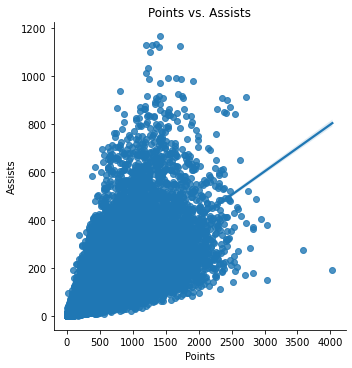

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
season_data = pd.read_csv('./Seasons_Stats.csv')

# Drop unnecessary columns
season_data = season_data.drop('Unnamed: 0', axis=1)

# Fill missing values
season_data = season_data.fillna(0)

# Convert data types
season_data['Year'] = season_data['Year'].astype(int)

# Filter data to include only relevant columns
df = season_data[['Year', 'PTS', 'AST', 'TRB']]

# Compute correlations between variables
corr = df.corr()

# Create linear regression plot for points and assists
sns.lmplot(x='PTS', y='AST', data=df)

# Set title and axes labels
plt.title('Points vs. Assists')
plt.xlabel('Points')
plt.ylabel('Assists')

# Show the plot
plt.show()


I tried to have a graph with Assists and Points to see the correlation between Great Scorers and Great Team Players. However this does not help at all as this graph is simply a clump of data. I would like to learn more about how I can analyze the data and create a more accurate graph.